# Aplicación de Machine Learning para la Detección de Anomalías
## Exploración del conjunto de datos

Alumno/a: Aizane Rubio Iturria\
Titulación: Máster Oficial en Big Data y Data Science\
Convocatoria: Segunda\
Curso Académico: 2023-2024 \
Director/a del TFM: Cristina Caro González

Este notebook se ha utilizado para generar distintas visualizaciones de la base de datos, alguans de las cuales están en la memoria. Mediante este notebook se pretende conocer mejor las características de la base de datos y su relación con la variable que queremos predecir.

### Imporación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

from scipy.stats import chi2_contingency, spearmanr, pearsonr

### Variables generales

In [3]:
# PARAMETROS
#PALETA DE COLORES
colores_pastel = ['#FA8072',
                  '#87CEEB', 
                  '#FFA07A', 
                  '#98FB98', 
                  '#FFD700', 
                  '#FFB6C1'] 
seed = 42

### Lectura 

In [5]:
# RUTAS
csv_IDS2018 = r"C:\Users\AIZANE\~\datasets\Processed Traffic Data for ML Algorithms/"
ruta_intermedia = r"C:\Users\AIZANE\Documents\MASTER\TFM/"

In [6]:
IDS2018_BruteForce = pd.read_csv(csv_IDS2018 + 'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')
IDS2018_BruteForce.columns = IDS2018_BruteForce.columns.str.replace(' ', '_')

## 1. Exploración del dataset

### 1.1 Exploración general

Realizamos un primer análisis general, para conocer la estructura del dataset.

In [30]:
# Comprobamos tamaño del dataset
IDS2018_BruteForce.shape

(1048575, 80)

In [12]:
IDS2018_BruteForce.columns

Index(['Dst_Port', 'Protocol', 'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
      

In [13]:
print(IDS2018_BruteForce.head())

   Dst_Port  Protocol            Timestamp  Flow_Duration  Tot_Fwd_Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   

   Tot_Bwd_Pkts  TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  \
0             0                0                0                0   
1             0                0                0                0   
2             0                0                0                0   
3            10             1239             2273              744   
4            11             1143             2209              744   

   Fwd_Pkt_Len_Min  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0                0  ...                 0          0.0    

In [14]:
IDS2018_BruteForce.describe()

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,6.255555e+06,6.206622e+00,7.211191e+00,4.479936e+02,4.521803e+03,1.745736e+02,8.389535e+00,3.879579e+01,...,2.793536e+00,2.327970e+01,5.152449e+04,2.136151e+04,8.789157e+04,3.995477e+04,3.101206e+06,7.297218e+05,4.812391e+06,2.126920e+06
std,1.444344e+04,4.460625e+00,1.260291e+09,4.447851e+01,1.048682e+02,1.573541e+04,1.515021e+05,2.876713e+02,1.948279e+01,5.331882e+01,...,5.557106e+00,1.106185e+01,5.815586e+05,2.186405e+05,7.395725e+05,5.602693e+05,5.414780e+08,3.820031e+08,1.522117e+09,1.817013e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.300000e+01,6.000000e+00,1.023000e+03,2.000000e+00,1.000000e+00,3.600000e+01,5.500000e+01,3.400000e+01,0.000000e+00,2.566667e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,6.000000e+00,4.066690e+05,7.000000e+00,6.000000e+00,4.550000e+02,7.680000e+02,1.990000e+02,0.000000e+00,5.550000e+01,...,4.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553300e+04,1.700000e+01,1.200000e+08,5.115000e+03,9.198000e+03,8.591554e+06,1.339773e+07,6.444000e+04,1.460000e+03,1.121703e+04,...,1.031000e+03,4.800000e+01,1.102401e+08,5.723446e+07,1.102401e+08,1.102401e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10


In [15]:
IDS2018_BruteForce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst_Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow_Duration      1048575 non-null  int64  
 4   Tot_Fwd_Pkts       1048575 non-null  int64  
 5   Tot_Bwd_Pkts       1048575 non-null  int64  
 6   TotLen_Fwd_Pkts    1048575 non-null  int64  
 7   TotLen_Bwd_Pkts    1048575 non-null  int64  
 8   Fwd_Pkt_Len_Max    1048575 non-null  int64  
 9   Fwd_Pkt_Len_Min    1048575 non-null  int64  
 10  Fwd_Pkt_Len_Mean   1048575 non-null  float64
 11  Fwd_Pkt_Len_Std    1048575 non-null  float64
 12  Bwd_Pkt_Len_Max    1048575 non-null  int64  
 13  Bwd_Pkt_Len_Min    1048575 non-null  int64  
 14  Bwd_Pkt_Len_Mean   1048575 non-null  float64
 15  Bwd_Pkt_Len_Std    1048575 non-n

### 1.2. Exploración de los campos

### *Label* - (Variable Clase)

In [21]:
# Analizamos lo balanceada que está la clase
counts = IDS2018_BruteForce['Label'].value_counts()
# Mostrar el recuento de cada categoría en la columna 'Label'
print("Recuento de cada tipo en la columna 'Label':")
print(counts)

Recuento de cada tipo en la columna 'Label':
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64


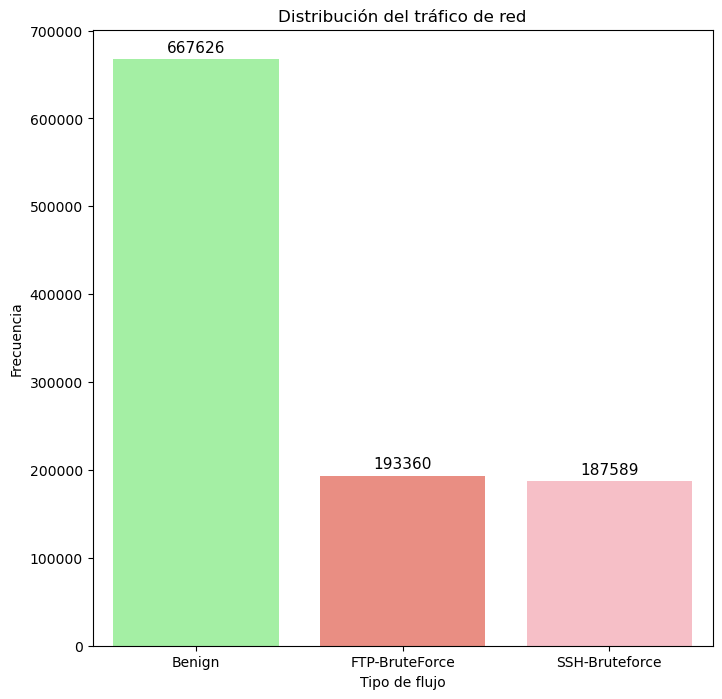

In [30]:
# Graficar la distribución de la clase
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Label', data=IDS2018_BruteForce, palette=[colores_pastel[3], colores_pastel[0], colores_pastel[5]])
plt.title('Distribución del tráfico de red')
plt.xlabel('Tipo de flujo')
plt.ylabel('Frecuencia')

# Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11)

plt.figure(figsize=(10, 8))
ax = sns.countplot(y='Label', data=IDS2018_BruteForce, palette=[colores_pastel[3], colores_pastel[0], colores_pastel[5]])

# Títulos y etiquetas 
plt.title('Distribución del tráfico de red', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Tipo de flujo', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

# Mostrar el gráfico
plt.show()lor='black', xytext=(0, 5), textcoords='offset points')
#plt.savefig('grafico_label.png', dpi=300, bbox_inches='tight')
plt.show()

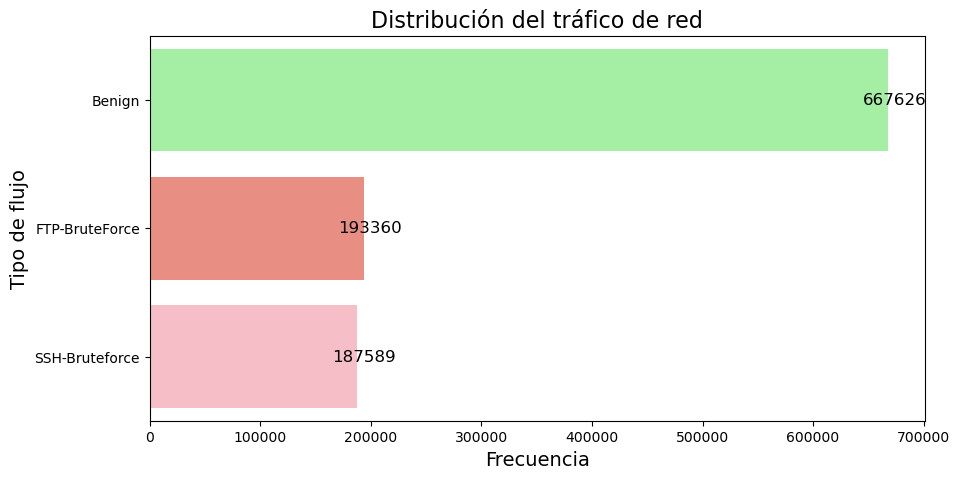

In [19]:
# Graficar la distribución de los puertos de destino en barras horizontales
plt.figure(figsize=(10, 5))
ax = sns.countplot(y='Label', data=IDS2018_BruteForce, palette=[colores_pastel[3], colores_pastel[0], colores_pastel[5]])

# Títulos y etiquetas
plt.title('Distribución del tráfico de red', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Tipo de flujo', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')
plt.savefig('grafico_label.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

### *Dst Port* - Puerto

In [27]:
unique_ports_count = IDS2018_BruteForce['Dst_Port'].nunique()
print(f"Número de puertos diferentes: {unique_ports_count}")

Número de puertos diferentes: 18567


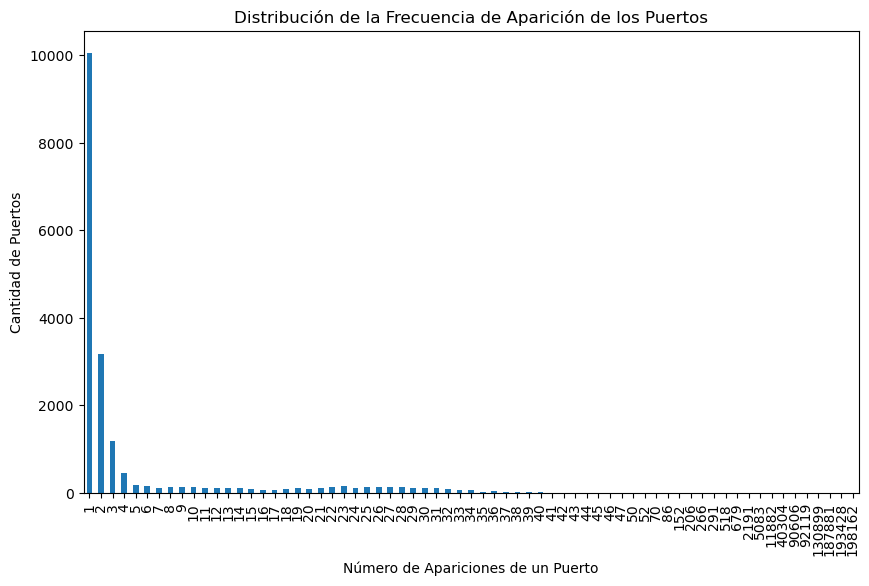

In [29]:
# Contar la frecuencia de cada puerto
port_counts = IDS2018_BruteForce['Dst_Port'].value_counts()

# Contar la frecuencia de las frecuencias (cuántos puertos aparecen una vez, dos veces, etc.)
frequency_counts = port_counts.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar')
plt.xlabel('Número de Apariciones de un Puerto')
plt.ylabel('Cantidad de Puertos')
plt.title('Distribución de la Frecuencia de Aparición de los Puertos')
plt.show()

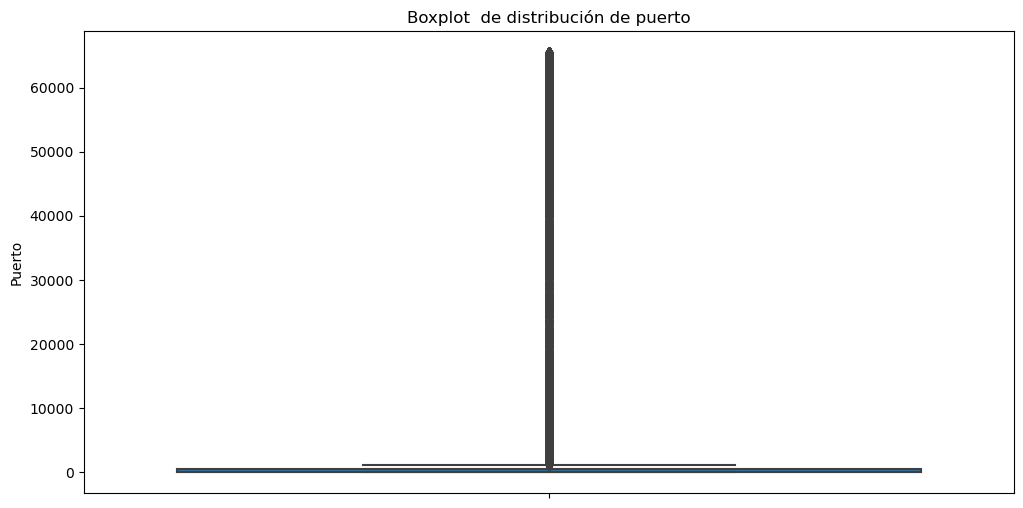

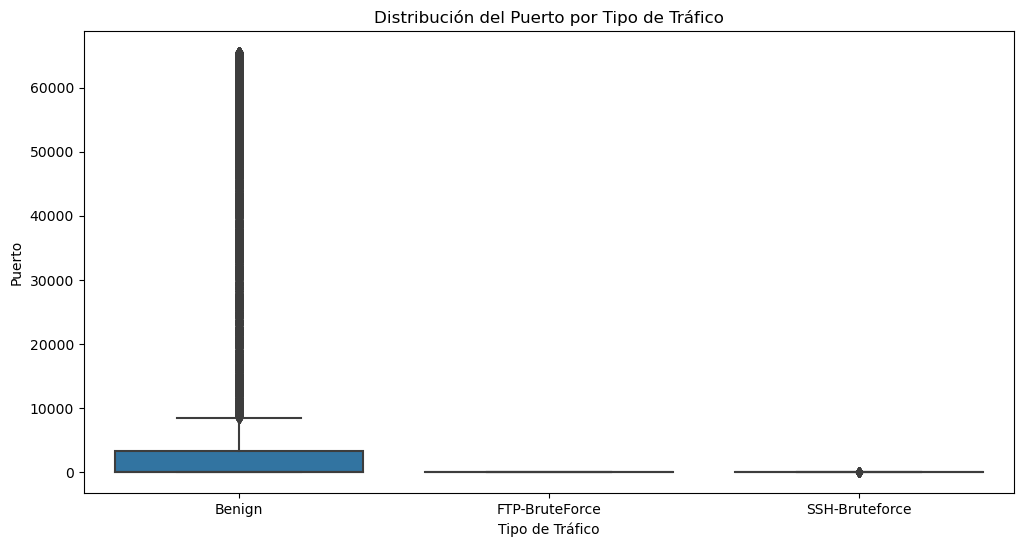

In [32]:
# Boxplot de la duración del flujo por puerto
plt.figure(figsize=(12, 6))
sns.boxplot(y='Dst_Port', data=IDS2018_BruteForce)
plt.title('Boxplot  de distribución de puerto')
plt.ylabel('Puerto')
plt.show()

# Boxplot de la duración del flujo por tipo de tráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Dst_Port', data=IDS2018_BruteForce)
plt.title('Distribución del Puerto por Tipo de Tráfico')
plt.xlabel('Tipo de Tráfico')
plt.ylabel('Puerto')
plt.savefig('bloxpot_puerto.png', dpi=300, bbox_inches='tight')
plt.show()


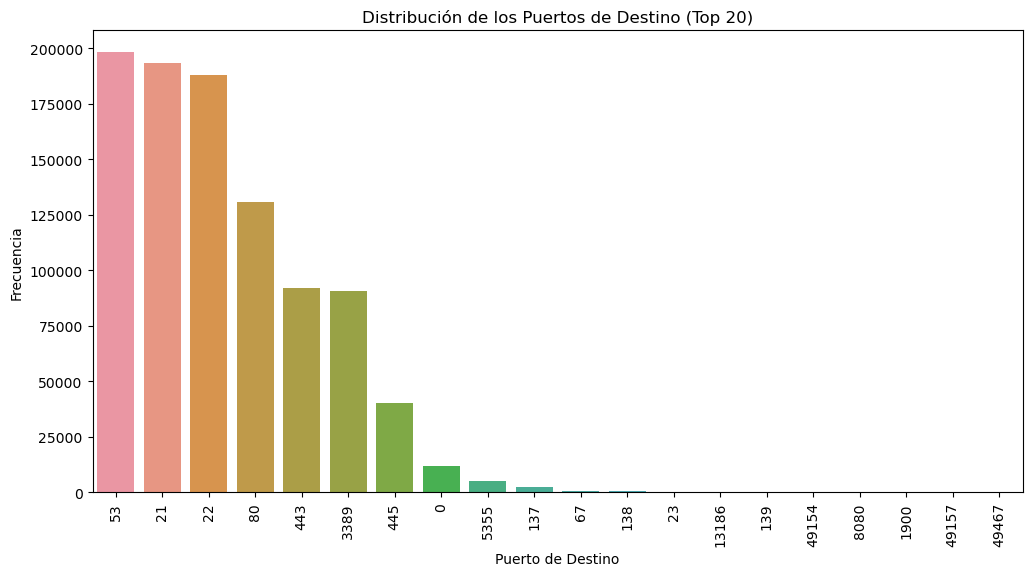

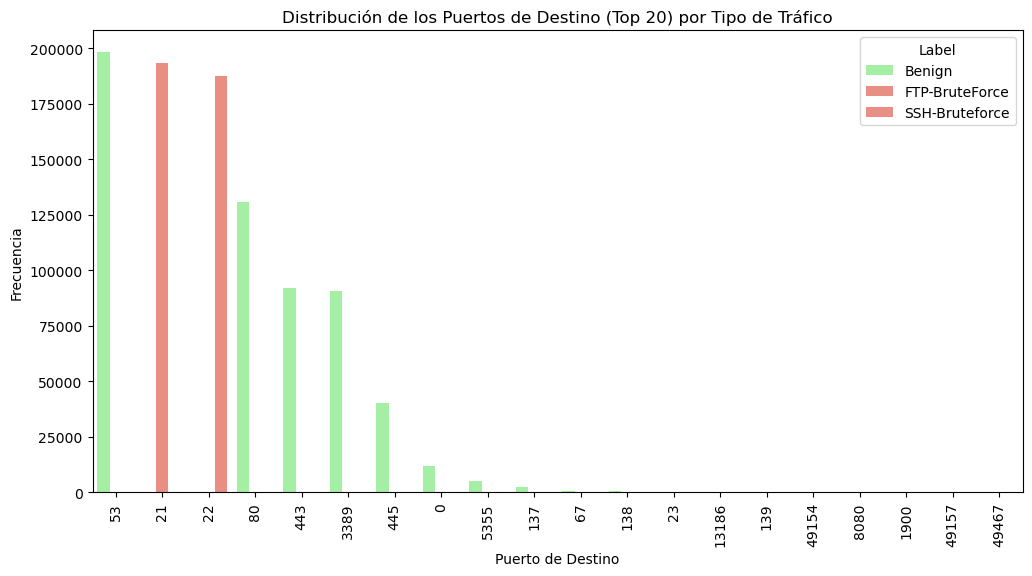

In [33]:
# Ver la distribución de los puertos de destino
plt.figure(figsize=(12, 6))
sns.countplot(x='Dst_Port', data=IDS2018_BruteForce, order=IDS2018_BruteForce['Dst_Port'].value_counts().iloc[:20].index)
plt.title('Distribución de los Puertos de Destino (Top 20)')
plt.xlabel('Puerto de Destino')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Analizar la relación entre `Dst_Port` y `Label` (benigno/malicioso)
plt.figure(figsize=(12, 6))
sns.countplot(x='Dst_Port', hue='Label', data=IDS2018_BruteForce, order=IDS2018_BruteForce['Dst_Port'].value_counts().iloc[:20].index, palette = [colores_pastel[3],colores_pastel[0],colores_pastel[0]])
plt.title('Distribución de los Puertos de Destino (Top 20) por Tipo de Tráfico')
plt.xlabel('Puerto de Destino')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.legend(title='Label')
plt.show()


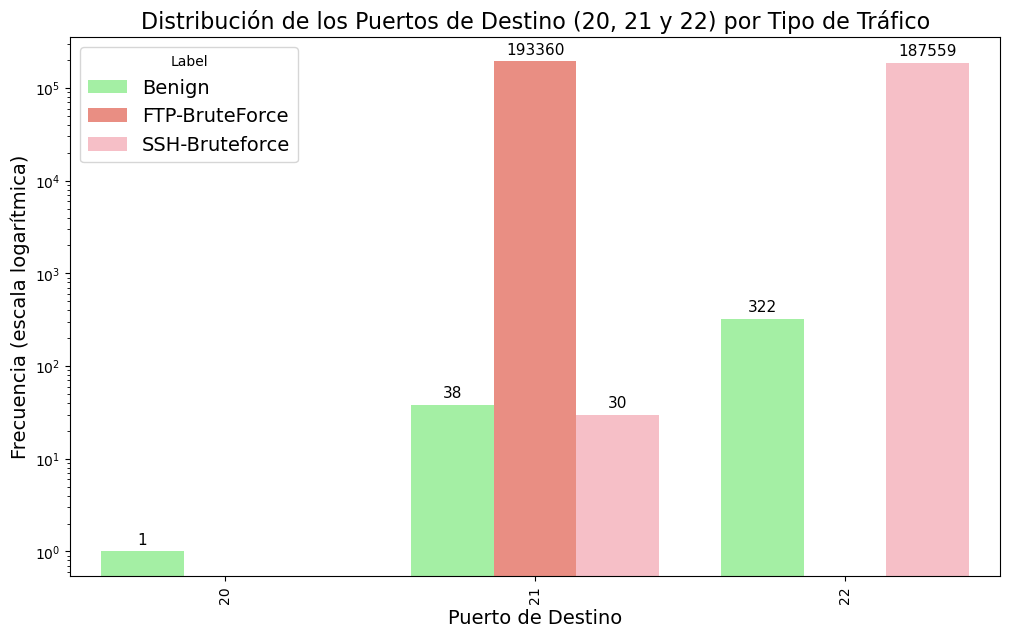

In [21]:
# Filtrar el DataFrame para los puertos 20, 21 y 22
puertos2221 = IDS2018_BruteForce[(IDS2018_BruteForce['Dst_Port'] == 20) | 
                                 (IDS2018_BruteForce['Dst_Port'] == 21) | 
                                 (IDS2018_BruteForce['Dst_Port'] == 22)]

# Configuración del gráfico
plt.figure(figsize=(12, 7))

# Gráfico de conteo 
ax = sns.countplot(x='Dst_Port', hue='Label', data=puertos2221,  
                   palette=[colores_pastel[3], colores_pastel[0], colores_pastel[5]])

# Títulos y etiquetas
plt.title('Distribución de los Puertos de Destino (20, 21 y 22) por Tipo de Tráfico', fontsize=16)
plt.xlabel('Puerto de Destino', fontsize=14)
plt.ylabel('Frecuencia (escala logarítmica)', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Label', fontsize=14)
# Escala logarítmica en el eje Y para mejorar la visualización
plt.yscale('log')
# Añadir los valores sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Guardar el gráfico como imagen si lo deseas
plt.savefig('puertos22_21.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

In [37]:
# Mostrar el recuento de cada categoría en las columnas 'Dst_Port' y 'Label'
counts = IDS2018_BruteForce.groupby(['Dst_Port', 'Label']).size().reset_index(name='Count')
print("Recuento de cada tipo en la columna 'Dst_Port':")
print(counts)

Recuento de cada tipo en la columna 'Dst_Port':
       Dst_Port           Label   Count
0             0          Benign   11882
1            12          Benign       1
2            20          Benign       1
3            21          Benign      38
4            21  FTP-BruteForce  193360
...         ...             ...     ...
18565     65525          Benign       1
18566     65526          Benign       2
18567     65530          Benign       2
18568     65532          Benign       3
18569     65533          Benign       2

[18570 rows x 3 columns]


In [39]:
# Calcular el total por cada puerto
total_counts = counts.groupby('Dst_Port')['Count'].sum().reset_index()

# Filtrar los datos para ataques malignos (no benignos)
malicious_counts = counts[counts['Label'] != 'Benign'].groupby('Dst_Port')['Count'].sum().reset_index()

# Combinar ambos DataFrames
combined_counts = pd.merge(total_counts, malicious_counts, on='Dst_Port', how='left', suffixes=('_total', '_malicious'))

# Rellenar NaN con 0 para puertos sin ataques malignos
combined_counts['Count_malicious'] = combined_counts['Count_malicious'].fillna(0)

# Calcular el porcentaje de ataques malignos por puerto
combined_counts['Malicious_Percentage'] = (combined_counts['Count_malicious'] / combined_counts['Count_total']) * 100

combined_counts = combined_counts.sort_values(by='Malicious_Percentage', ascending=False)


print(combined_counts)

       Dst_Port  Count_total  Count_malicious  Malicious_Percentage
3            21       193428         193390.0             99.980354
4            22       187881         187559.0             99.828615
0             0        11882              0.0              0.000000
12376     56369            3              0.0              0.000000
12383     56379            7              0.0              0.000000
...         ...          ...              ...                   ...
6190      48992            1              0.0              0.000000
6189      48933            2              0.0              0.000000
6188      48929            1              0.0              0.000000
6187      48926            1              0.0              0.000000
18566     65533            2              0.0              0.000000

[18567 rows x 4 columns]


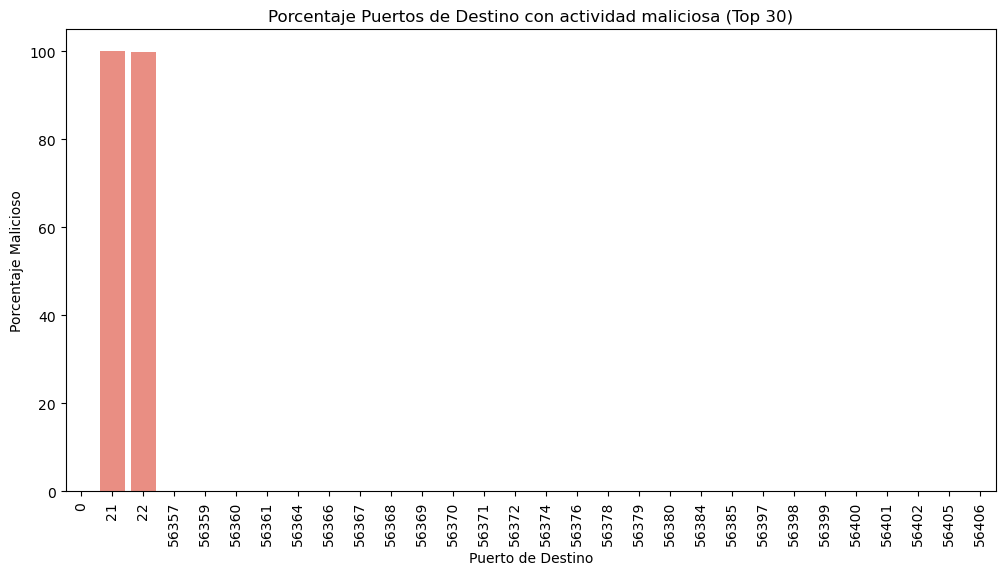

In [41]:
# Limiting to the top 20 ports by Malicious Percentage if needed
top_30_combined_counts = combined_counts.head(30)

# Ver la distribución de los puertos de destino
plt.figure(figsize=(12, 6))
sns.barplot(x='Dst_Port', y='Malicious_Percentage', data=top_30_combined_counts, palette = [colores_pastel[0]])
plt.title('Porcentaje Puertos de Destino con actividad maliciosa (Top 30)')
plt.xlabel('Puerto de Destino')
plt.ylabel('Porcentaje Malicioso')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Creamos el campo numeríco para estos análisis
map_target_class_label = {'Benign': 0, 'FTP-BruteForce': 1, 'SSH-Bruteforce': 2}
IDS2018_BruteForce['label_num'] = IDS2018_BruteForce['Label'].map(map_target_class_label)

In [45]:
tabla_contingencia = pd.crosstab(IDS2018_BruteForce['Dst_Port'], IDS2018_BruteForce['label_num'])

# Realizar el test de chi-cuadrado de independencia
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimir los resultados
print(f"Estadístico de prueba chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Calcular el coeficiente de correlación de Spearman
coeficiente_spearman, p_valor = spearmanr(IDS2018_BruteForce['Dst_Port'], IDS2018_BruteForce['label_num'])

# Imprimir el resultado
print(f"Coeficiente de Spearman: {coeficiente_spearman}")
print(f"P-valor: {p_valor}")

Estadístico de prueba chi-cuadrado: 2094252.3528911253
Valor p: 0.0
Coeficiente de Spearman: -0.7492846982796053
P-valor: 0.0


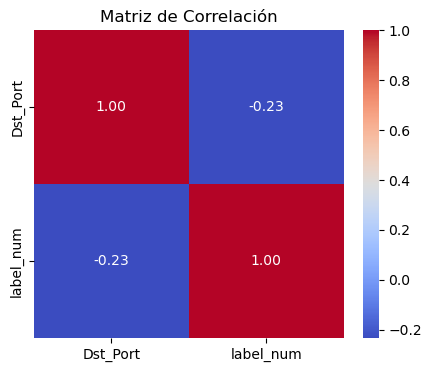

In [47]:
# Calcular la matriz de correlación (sólo de las columnas númericas)
corr_matrix = IDS2018_BruteForce[['Dst_Port','label_num']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Ambos test nos indican que se puede rechazar la hipótesis nula y podemos decir que ambas variables estan relacionadas.

### Protocol

In [49]:
counts = IDS2018_BruteForce['Protocol'].value_counts()
print("Recuento de cada tipo en la columna 'Protocol':")
print(counts)

Recuento de cada tipo en la columna 'Protocol':
6     829309
17    207384
0      11882
Name: Protocol, dtype: int64


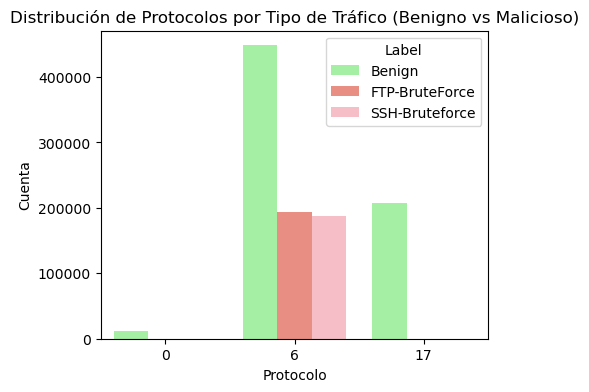

In [52]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Protocol', hue='Label', data=IDS2018_BruteForce, palette = [colores_pastel[3],colores_pastel[0],colores_pastel[5]])
plt.title('Distribución de Protocolos por Tipo de Tráfico (Benigno vs Malicioso)')
plt.xlabel('Protocolo')
plt.ylabel('Cuenta')
plt.legend(title='Label')

plt.savefig('protocolo.png', dpi=300, bbox_inches='tight')
plt.show()

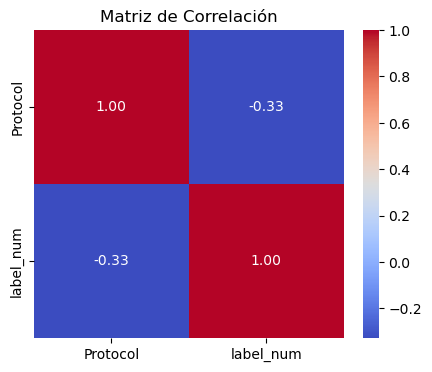

In [59]:
# Calcular la matriz de correlación (sólo de las columnas númericas)
corr_matrix = IDS2018_BruteForce[['Protocol','label_num']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
# Las que están en 

### Flow_Byts/s'

In [11]:
IDS2018_BruteForce['Flow_Byts/s'].describe()

count    1.046298e+06
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      8.815562e+01
75%      1.225461e+04
max               inf
Name: Flow_Byts/s, dtype: float64

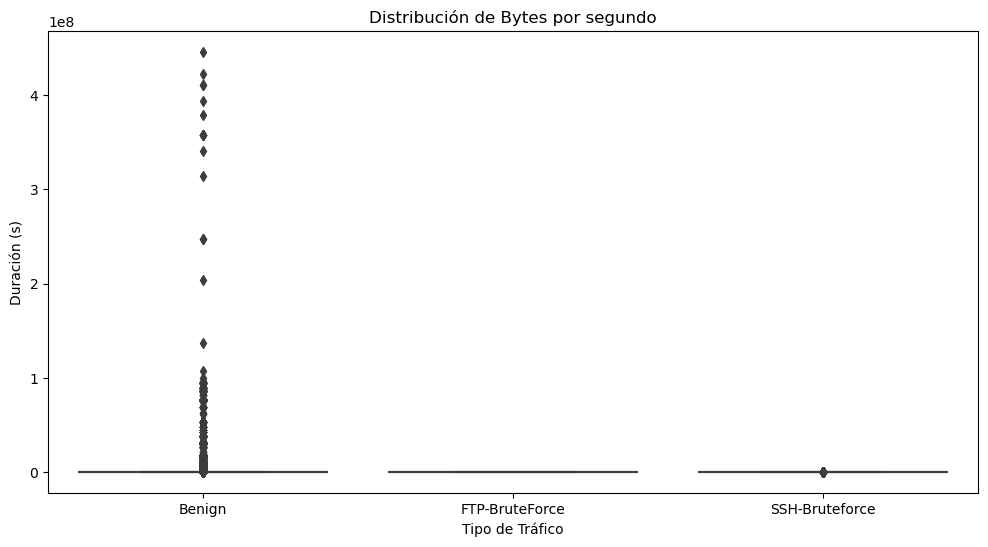

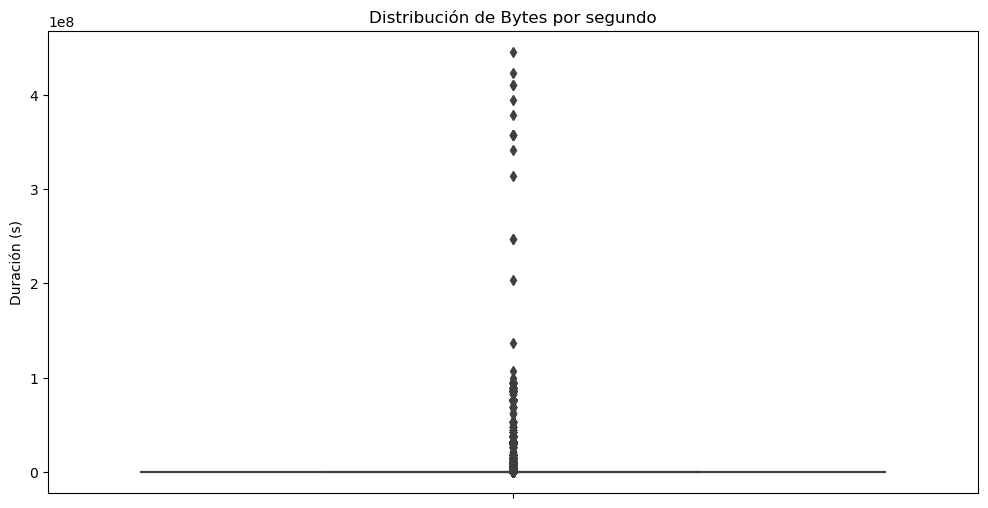

In [13]:
# Boxplot de la duración del flujo por tipo de tráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Flow_Byts/s', data=IDS2018_BruteForce)
plt.title('Distribución de Bytes por segundo')
plt.xlabel('Tipo de Tráfico')
plt.ylabel('Duración (s)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot( y='Flow_Byts/s', data=IDS2018_BruteForce)
plt.title('Distribución de Bytes por segundo')
plt.ylabel('Duración (s)')
plt.show()

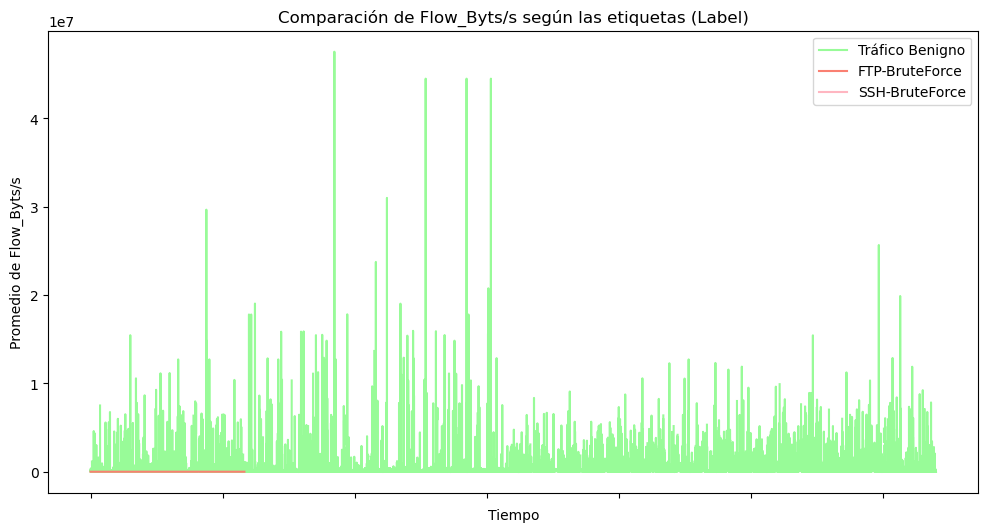

In [17]:
# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Gráfico de 'Flow_Byts/s' para el tráfico benigno
IDS2018_BruteForce[IDS2018_BruteForce['Label'] == 'Benign'].groupby('Timestamp')['Flow_Byts/s'].mean().plot(color=colores_pastel[3], label='Tráfico Benigno')

# Gráfico de 'Flow_Byts/s' para el tráfico FTP-BruteForce
IDS2018_BruteForce[IDS2018_BruteForce['Label'] == 'FTP-BruteForce'].groupby('Timestamp')['Flow_Byts/s'].mean().plot(color=colores_pastel[0], label='FTP-BruteForce')

# Gráfico de 'Flow_Byts/s' para el tráfico SSH-BruteForce
IDS2018_BruteForce[IDS2018_BruteForce['Label'] == 'SSH-BruteForce'].groupby('Timestamp')['Flow_Byts/s'].mean().plot(color=colores_pastel[5], label='SSH-BruteForce')

# Configuraciones adicionales del gráfico
plt.title('Comparación de Flow_Byts/s según las etiquetas (Label)')
plt.xlabel('Tiempo')
plt.ylabel('Promedio de Flow_Byts/s')
plt.legend()  # Mostrar la leyenda con los nombres de las líneas

# Mostrar el gráfico
plt.show()

### Flow Duration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


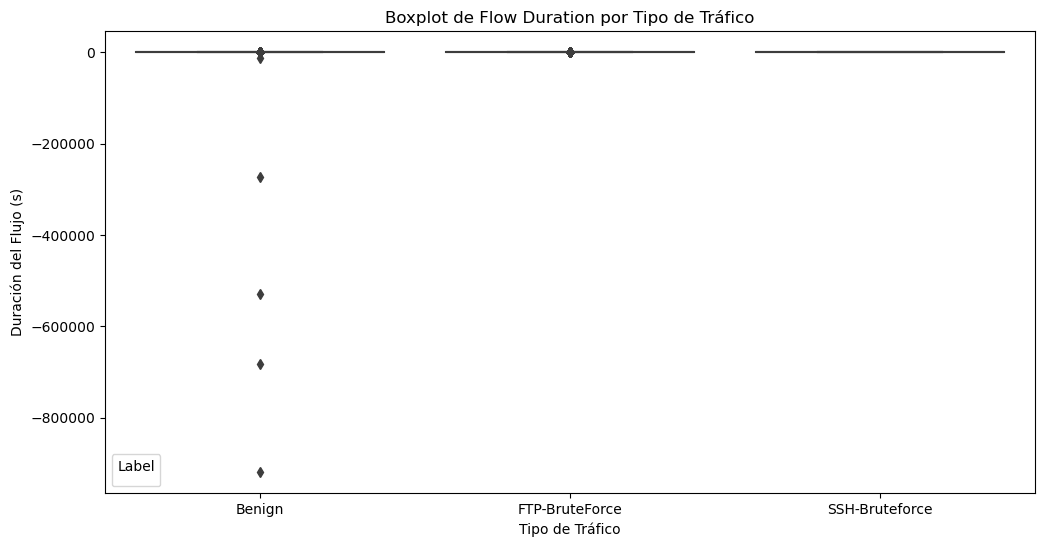

In [19]:
# Convertir la duración de microsegundos a segundos para mejor interpretación
IDS2018_BruteForce['Flow_Duration_s'] = IDS2018_BruteForce['Flow_Duration'] / 1_000_000

# Boxplot de la duración del flujo por tipo de tráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Flow_Duration_s', data=IDS2018_BruteForce)
plt.title('Boxplot de Flow Duration por Tipo de Tráfico')
plt.xlabel('Tipo de Tráfico')
plt.ylabel('Duración del Flujo (s)')
plt.legend(title='Label')  # Asegurarse de que la leyenda se añada con título
plt.show()

###  PAQUETES

In [40]:
# BLOQUE 2 - PAQUETES

var_Pkts = ['Tot_Fwd_Pkts','Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std','Flow_Pkts/s','Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var','Pkt_Size_Avg','Fwd_Pkts/b_Avg', 'Bwd_Pkts/b_Avg','Subflow_Fwd_Pkts',
        'Subflow_Bwd_Pkts','Fwd_Act_Data_Pkts']

IDS2018_02_Pkts = IDS2018_BruteForce[['Label'] + var_Pkts]

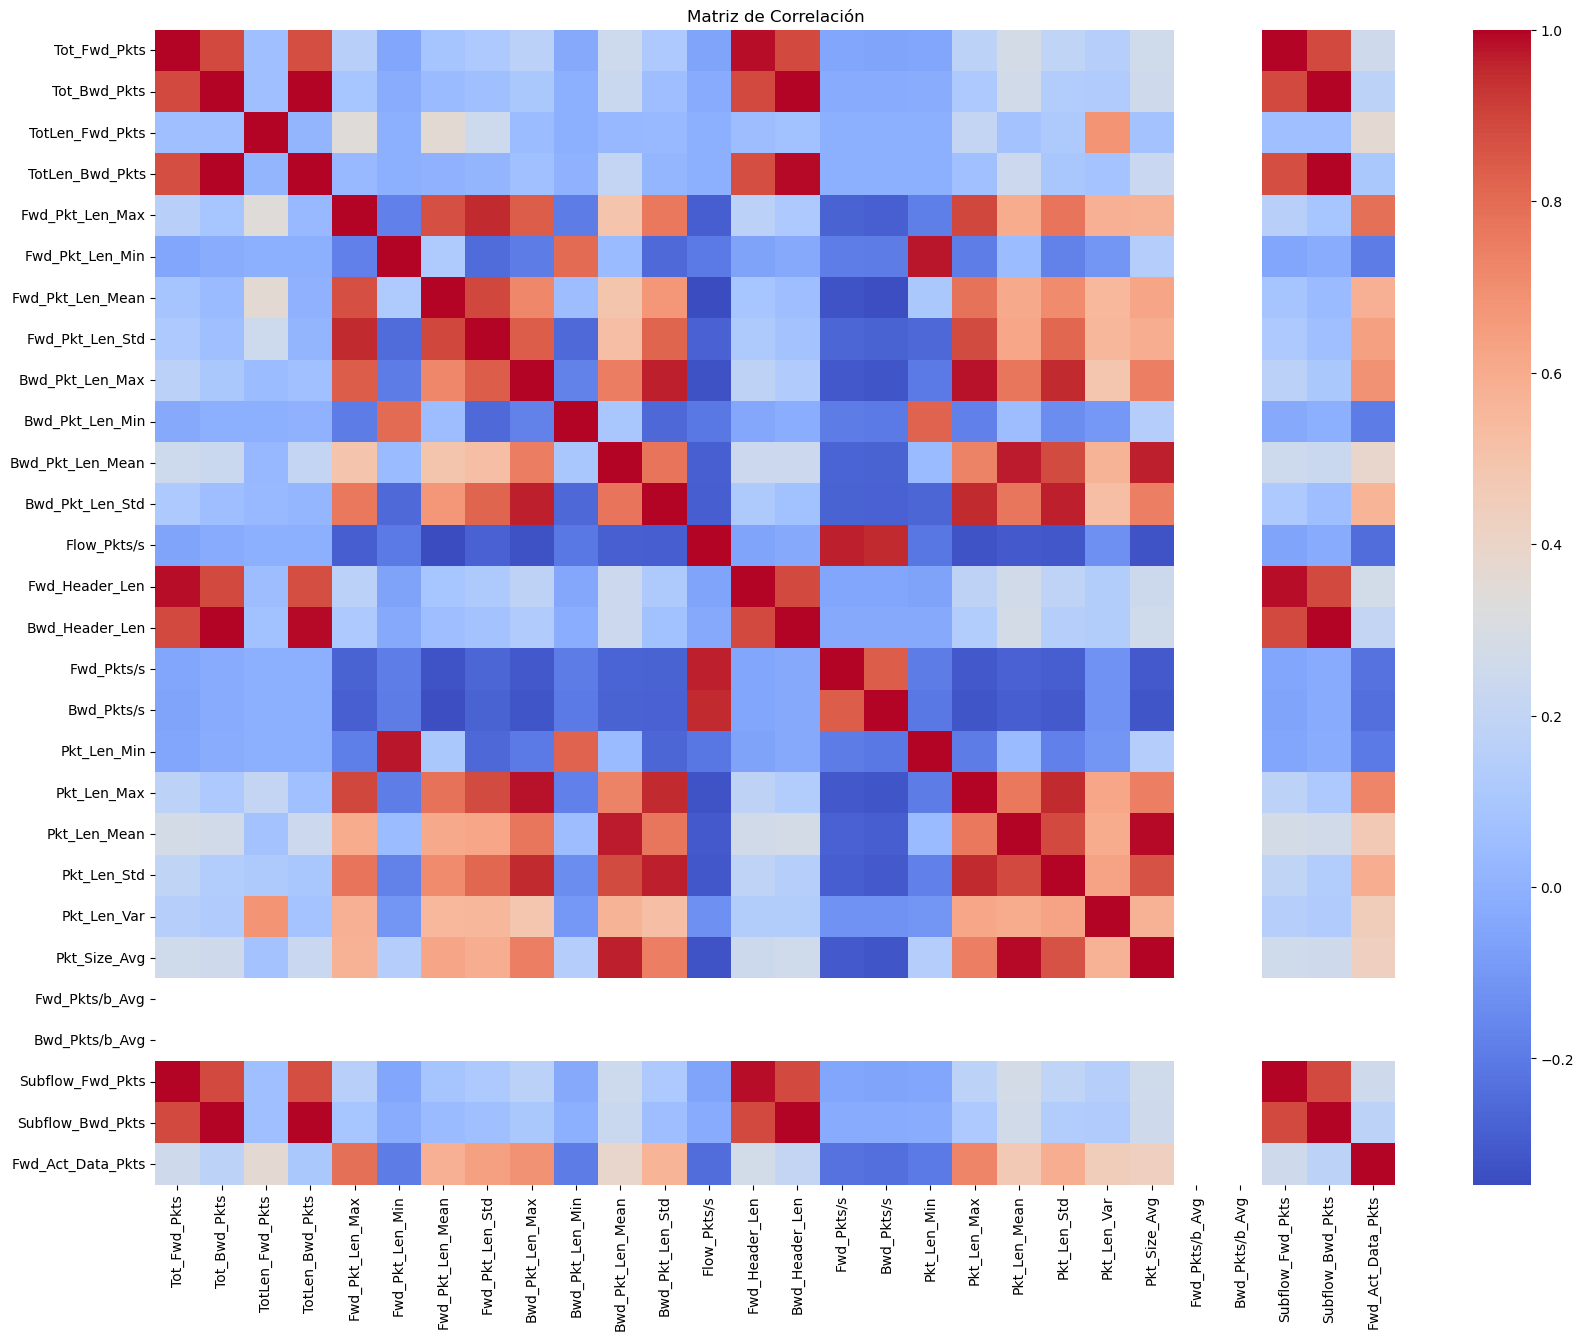

In [29]:
# Calcular la matriz de correlación (sólo de las columnas númericas)
corr_matrix = IDS2018_02_Pkts.corr(numeric_only=True)

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
# Las que están en blanco --> TODOS LOS VALORES SON 0.0

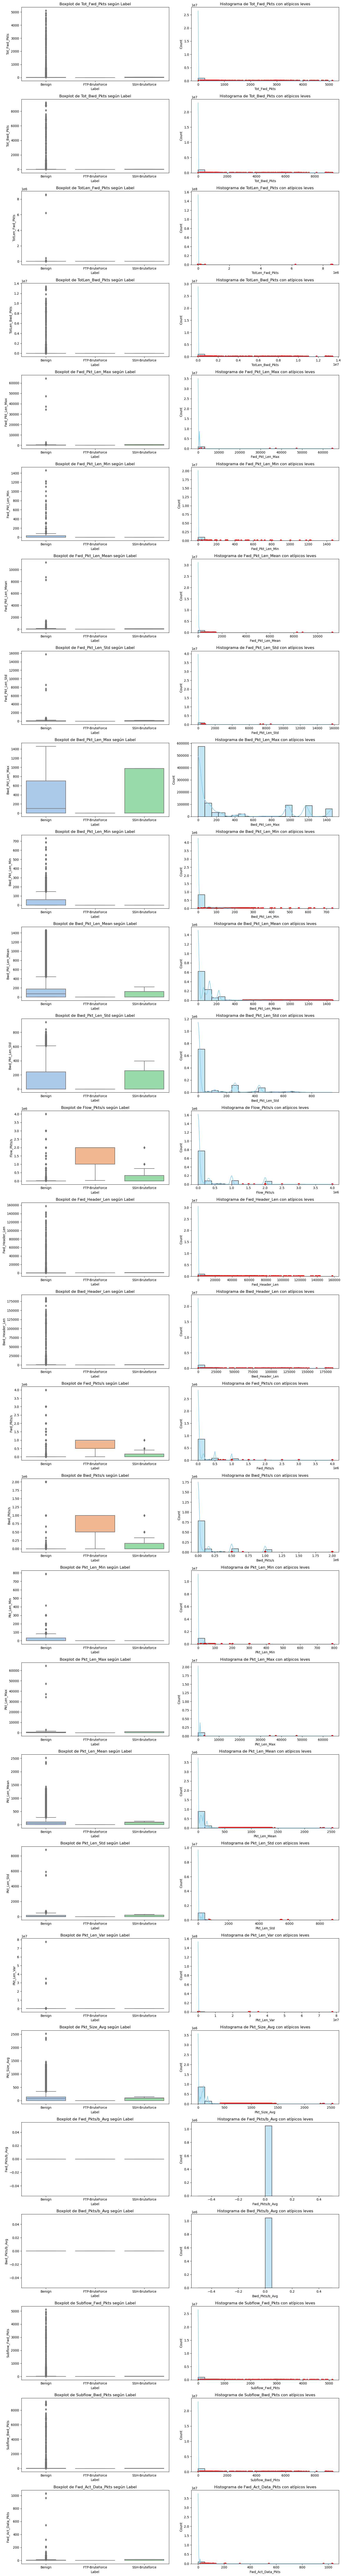

In [42]:
# Crear subplots
num_columns = len(var_Pkts)
fig, axes = plt.subplots(num_columns, 2, figsize=(15, 4*num_columns))

# Iterar sobre cada columna del dataset
for i, column in enumerate(var_Pkts):
    # Boxplot agrupado por la columna 'Label'
    sns.boxplot(x='Label', y=column, data=IDS2018_02_Pkts, ax=axes[i, 0], palette="pastel")
    axes[i, 0].set_title(f'Boxplot de {column} según Label')
    
    # Cálculo de los valores atípicos leves (outliers leves)
    Q1 = IDS2018_02_Pkts[column].quantile(0.25)
    Q3 = IDS2018_02_Pkts[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Detectar valores atípicos leves
    mild_outliers = IDS2018_02_Pkts[(IDS2018_02_Pkts[column] < lower_bound) | (IDS2018_02_Pkts[column] > upper_bound)]

    # Histograma con los valores atípicos marcados
    sns.histplot(IDS2018_02_Pkts[column], kde=True, bins=20, color='skyblue', label='Distribución', ax=axes[i, 1])
    axes[i, 1].scatter(mild_outliers[column], [0] * len(mild_outliers), color='red', label='Atípicos leves')

    # Configuración del título del histograma
    axes[i, 1].set_title(f'Histograma de {column} con atípicos leves')

# Ajustar el layout para evitar que los gráficos se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### IAT

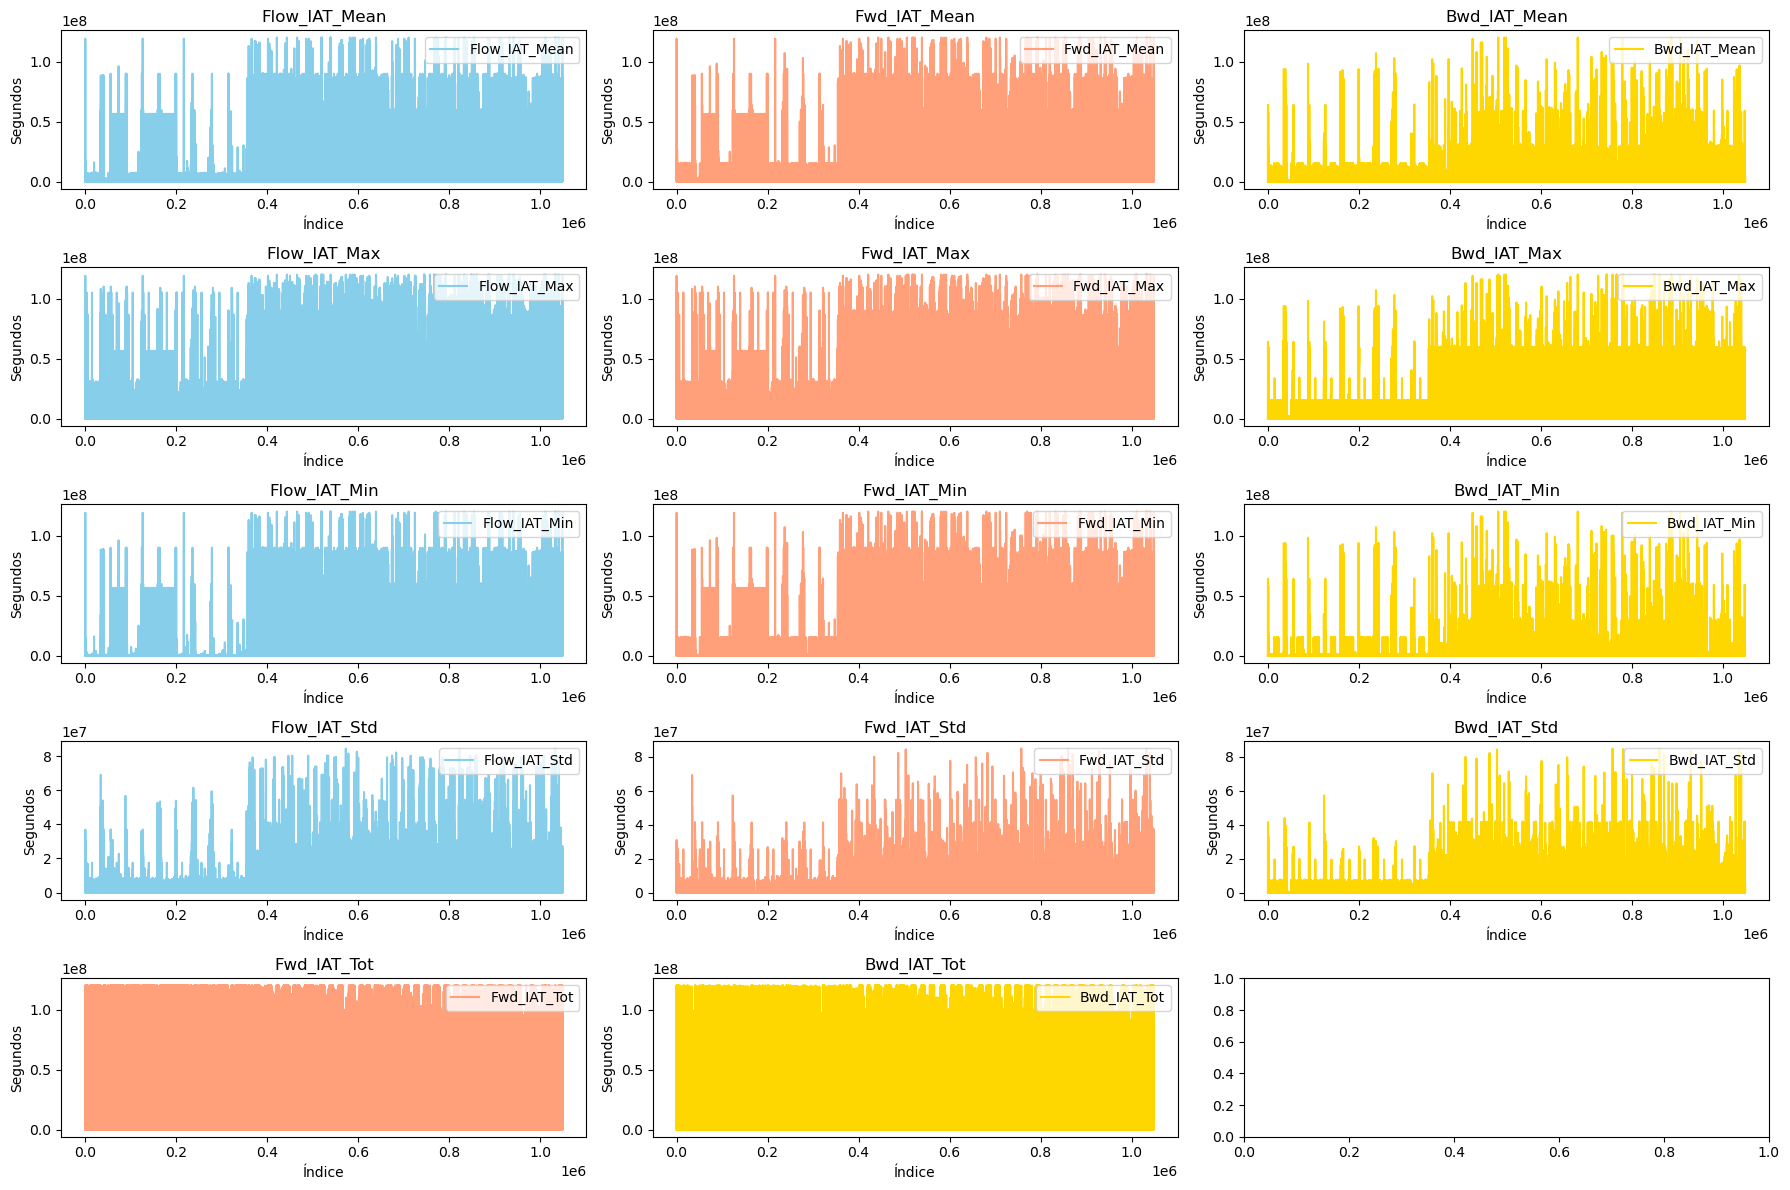

In [158]:
# Definir las variables y colores
variables = [
    ('Flow_IAT_Mean', colores_pastel[1]), 
    ('Fwd_IAT_Mean', colores_pastel[2]), 
    ('Bwd_IAT_Mean', colores_pastel[4]),
    ('Flow_IAT_Max', colores_pastel[1]), 
    ('Fwd_IAT_Max', colores_pastel[2]), 
    ('Bwd_IAT_Max', colores_pastel[4]),
    ('Flow_IAT_Min', colores_pastel[1]), 
    ('Fwd_IAT_Min', colores_pastel[2]), 
    ('Bwd_IAT_Min', colores_pastel[4]),
    ('Flow_IAT_Std', colores_pastel[1]), 
    ('Fwd_IAT_Std', colores_pastel[2]), 
    ('Bwd_IAT_Std', colores_pastel[4]),
    ('Fwd_IAT_Tot', colores_pastel[2]), 
    ('Bwd_IAT_Tot', colores_pastel[4])
]

# Crear subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterar sobre las variables y los ejes
for i, (var, color) in enumerate(variables):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce.index, IDS2018_BruteForce[var], label=var, color=color)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


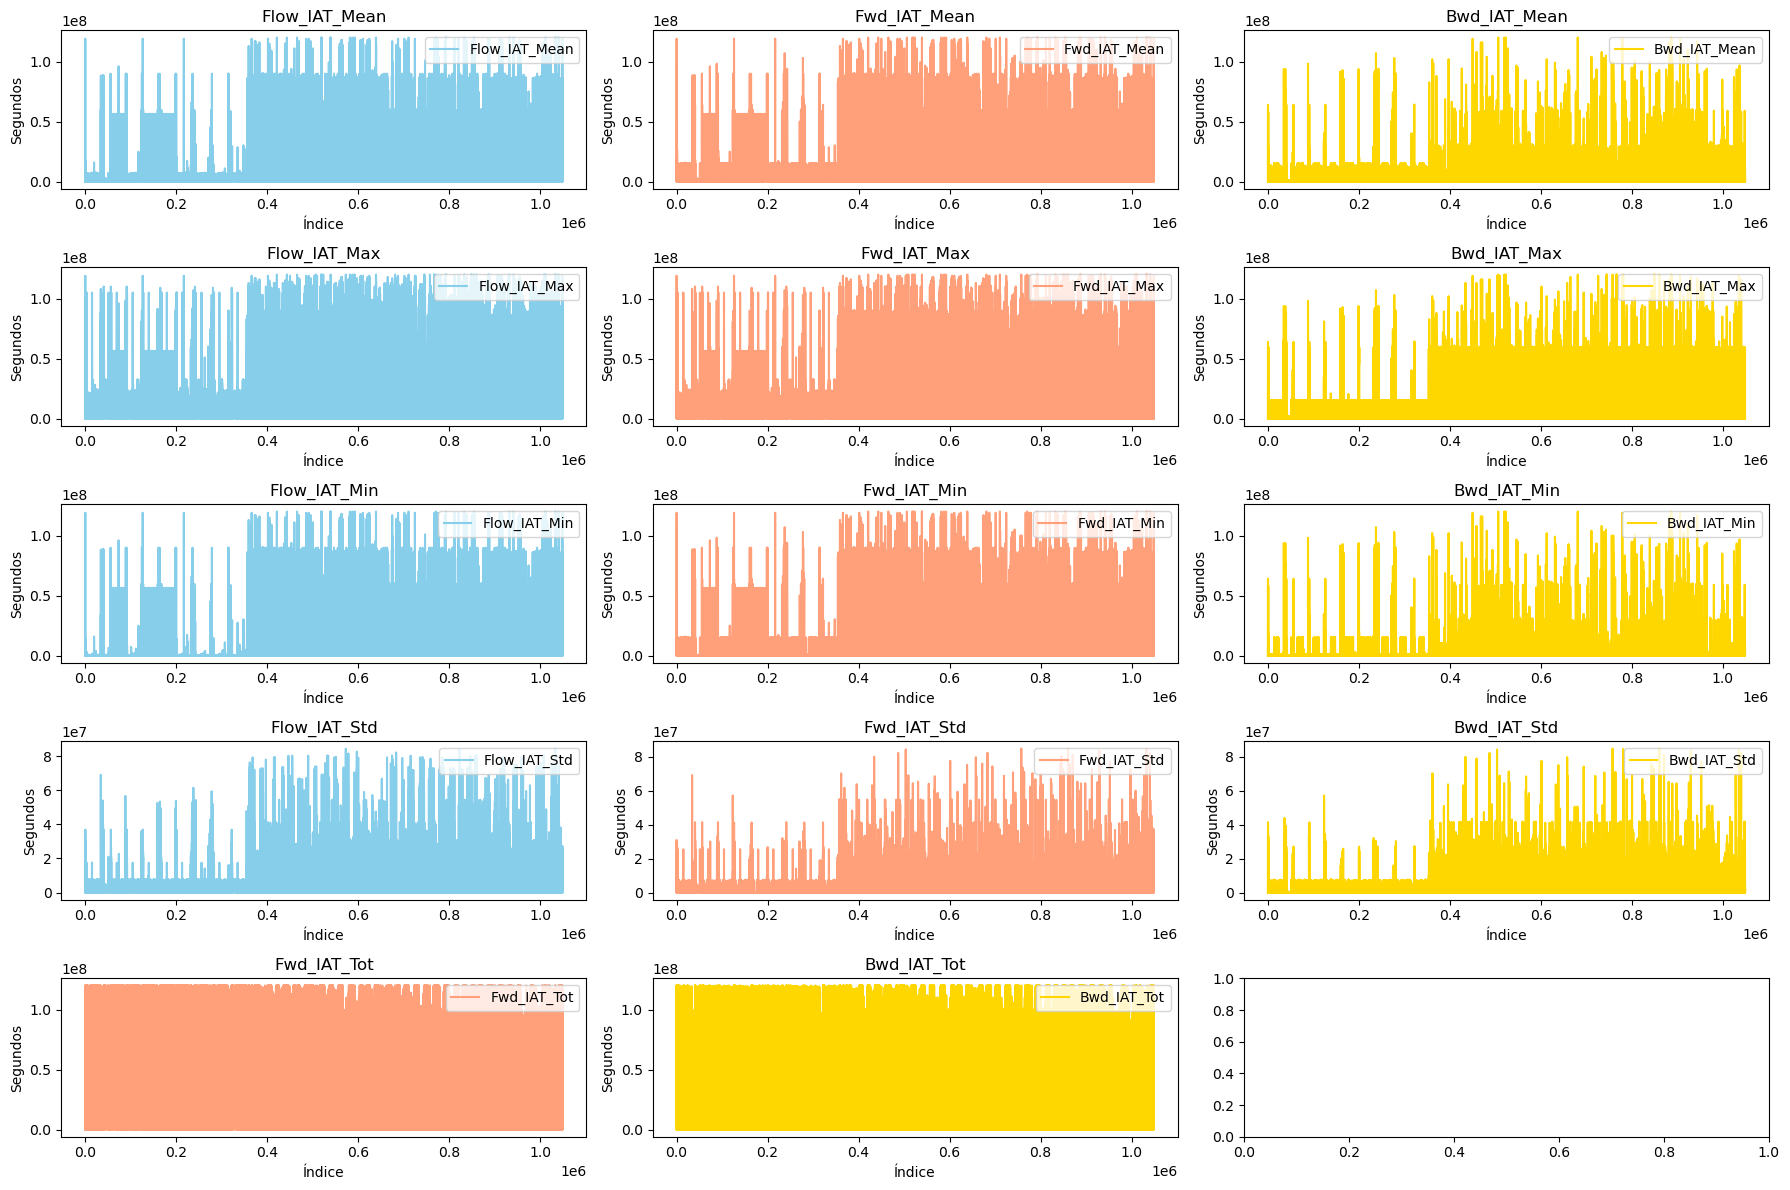

In [164]:
# Crear subplots
IDS2018_BruteForce_BEN = IDS2018_BruteForce[IDS2018_BruteForce['Label']=='Benign']
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterar sobre las variables y los ejes
for i, (var, color) in enumerate(variables):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce_BEN.index, IDS2018_BruteForce_BEN[var], label=var, color=color)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

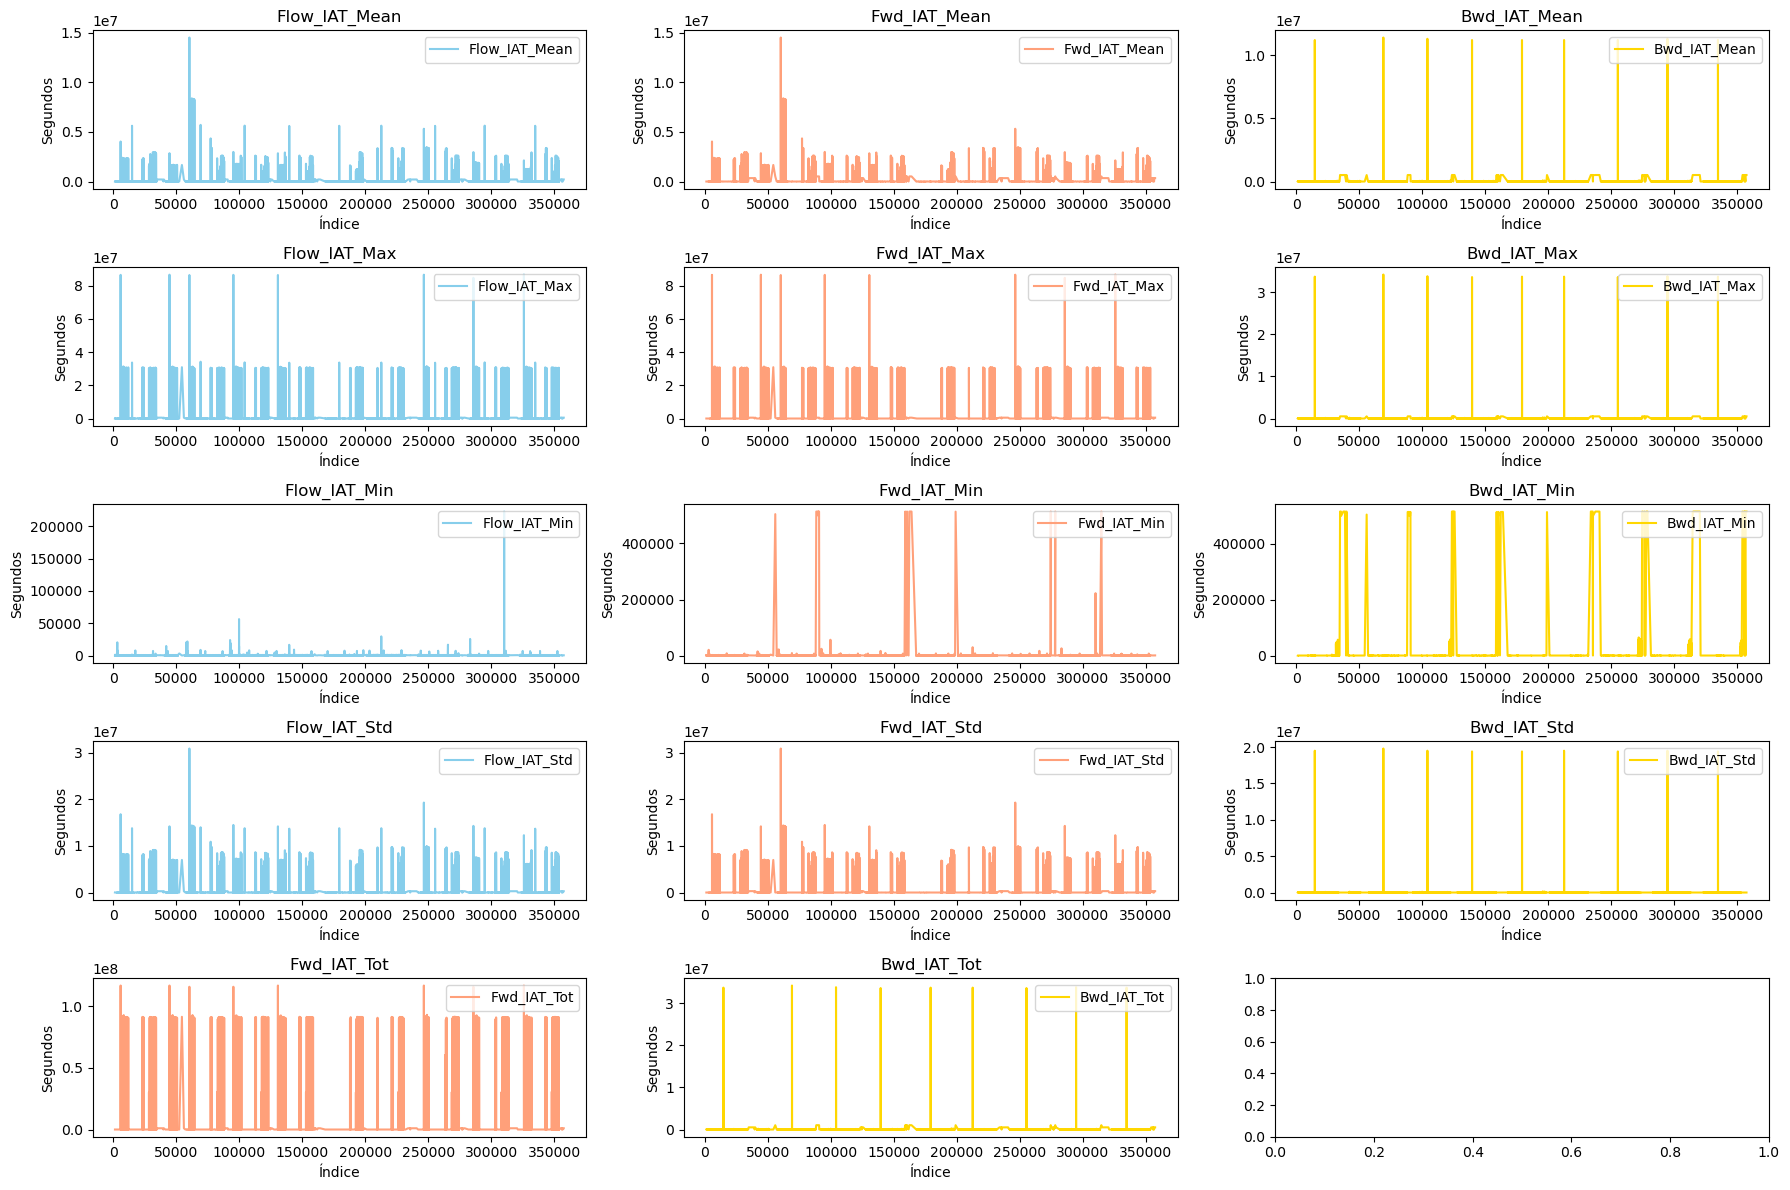

In [160]:
# Crear subplots
IDS2018_BruteForce_MAL = IDS2018_BruteForce[IDS2018_BruteForce['Label']!='Benign']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 12))


axes = axes.flatten()

# Iterar sobre las variables y los ejes
for i, (var, color) in enumerate(variables):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce_MAL.index, IDS2018_BruteForce_MAL[var], label=var, color=color)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')


plt.tight_layout()
plt.show()

In [54]:
variables = [ ('Fwd_IAT_Tot', colores_pastel[2]), 
    ('Bwd_IAT_Tot', colores_pastel[4])]

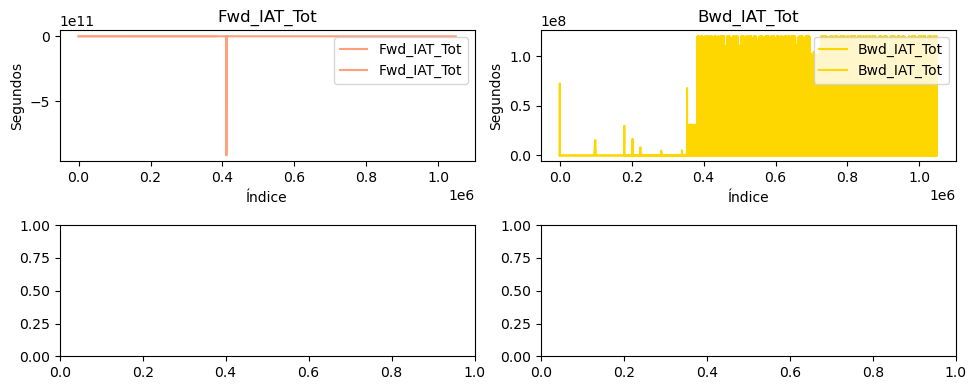

In [74]:
# Crear subplots
IDS2018_BruteForce_BEN = IDS2018_BruteForce[IDS2018_BruteForce['Label']=='Benign']
IDS2018_BruteForce_MAL = IDS2018_BruteForce[IDS2018_BruteForce['Label']!='Benign']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterar sobre las variables y los ejes
for i, (var, color) in enumerate(variables):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce_BEN.index, IDS2018_BruteForce_BEN[var], label=var, color=color)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')

# Iterar sobre las variables y los ejes
for i, (var, color) in enumerate(variables):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce_MAL.index, IDS2018_BruteForce_MAL[var], label=var, color=color)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')
    
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

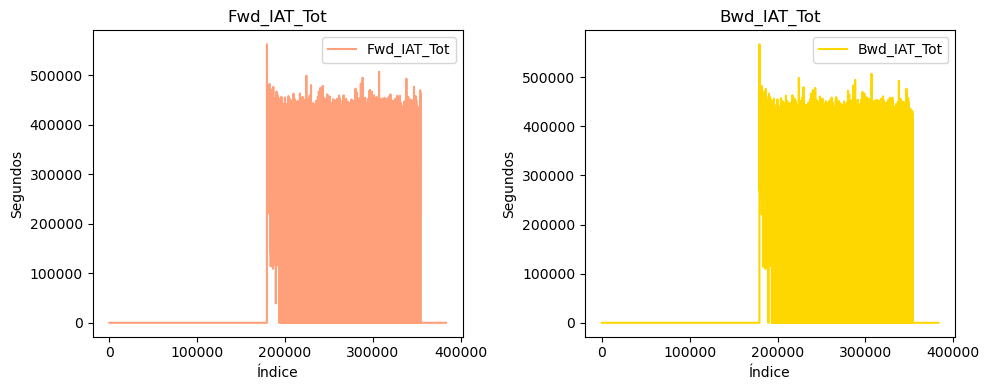

In [72]:
# Crear subplots
IDS2018_BruteForce_BEN = IDS2018_BruteForce[IDS2018_BruteForce['Label']!='Benign']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes = axes.flatten()

# Iterar sobre las variables y los ejes
for i, (var, color) in enumerate(variables):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce_BEN.index, IDS2018_BruteForce_BEN[var], label=var, color=color)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

### FLAG

In [27]:
 var_flag = ['FIN_Flag_Cnt','SYN_Flag_Cnt','RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt','CWE_Flag_Count', 'ECE_Flag_Cnt']

In [29]:
# Definir una paleta de colores personalizada
colores_pastel2 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']


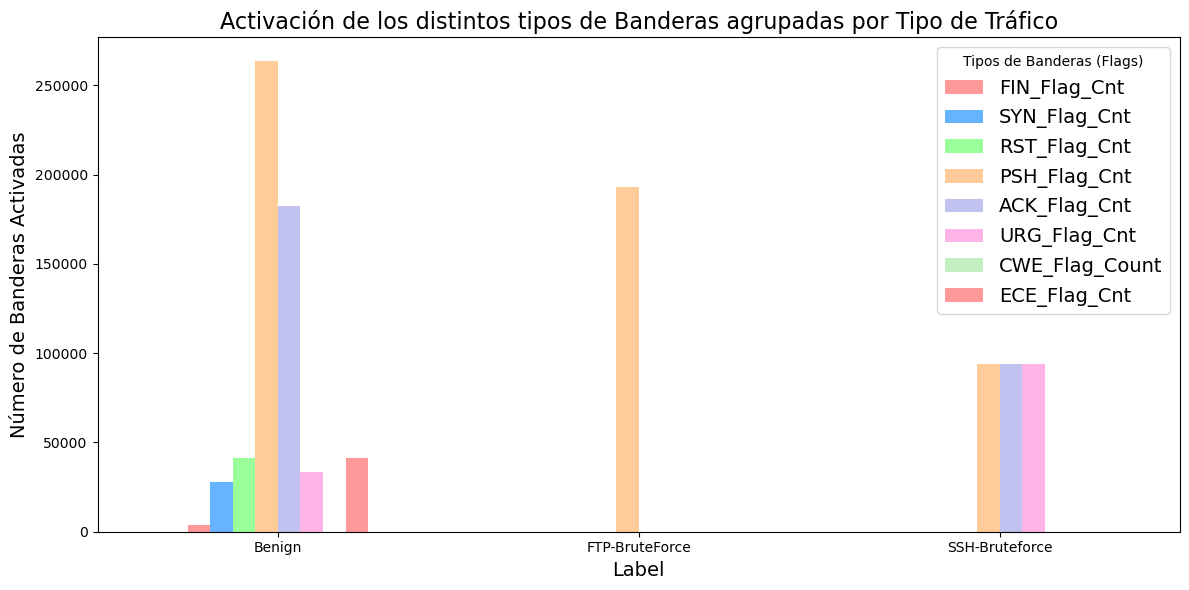

In [31]:
#Crear un DataFrame con las variables de flags y la columna 'Label'
flag_data = IDS2018_BruteForce[['Label'] + var_flag]

# Calcular la media de las banderas agrupadas por 'Label'
flag_means = flag_data.groupby('Label')[var_flag].sum().reset_index()

# Crear un gráfico de barras agrupado
flag_means.set_index('Label').plot(kind='bar', figsize=(12, 6),color=colores_pastel2)

# Configurar el gráfico
plt.title('Activación de los distintos tipos de Banderas agrupadas por Tipo de Tráfico', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Número de Banderas Activadas', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Tipos de Banderas (Flags)", fontsize=14)
plt.tight_layout()
plt.savefig('banderas.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

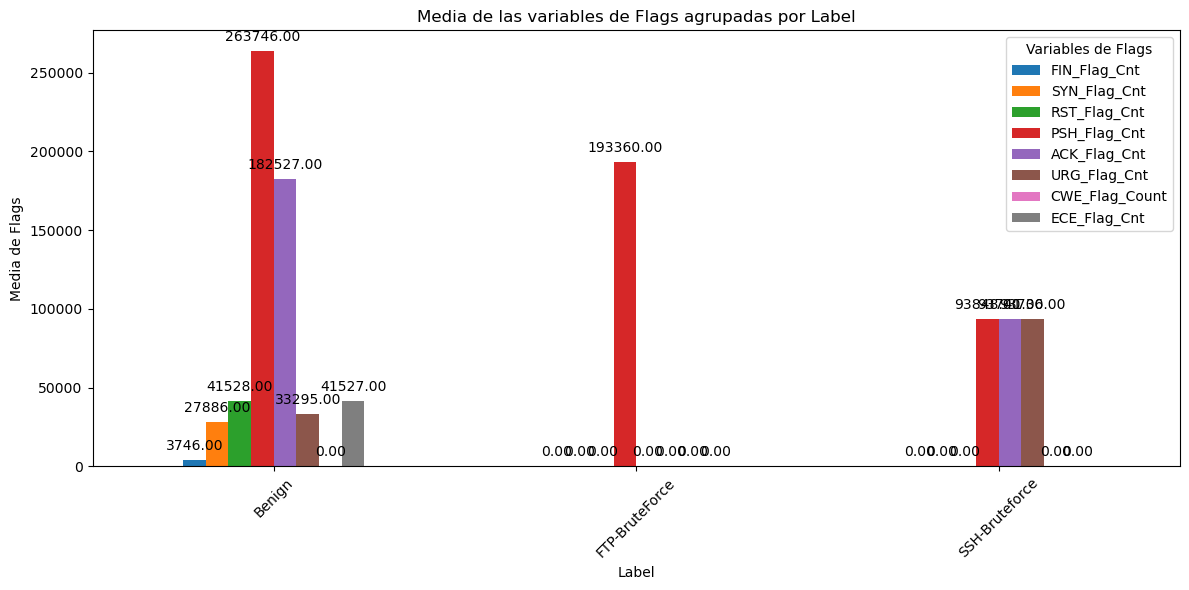

In [85]:
import matplotlib.pyplot as plt

# Crear un DataFrame con las variables de flags y la columna 'Label'
flag_data = IDS2018_BruteForce[['Label'] + var_flag]

# Calcular la media de las banderas agrupadas por 'Label'
flag_means = flag_data.groupby('Label')[var_flag].sum().reset_index()

# Crear un gráfico de barras agrupado
ax = flag_means.set_index('Label').plot(kind='bar', figsize=(12, 6))

# Añadir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Valor que se muestra
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del texto
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Configurar el gráfico
plt.title('Media de las variables de Flags agrupadas por Label')
plt.xlabel('Label')
plt.ylabel('Media de Flags')
plt.xticks(rotation=45)
plt.legend(title="Variables de Flags")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


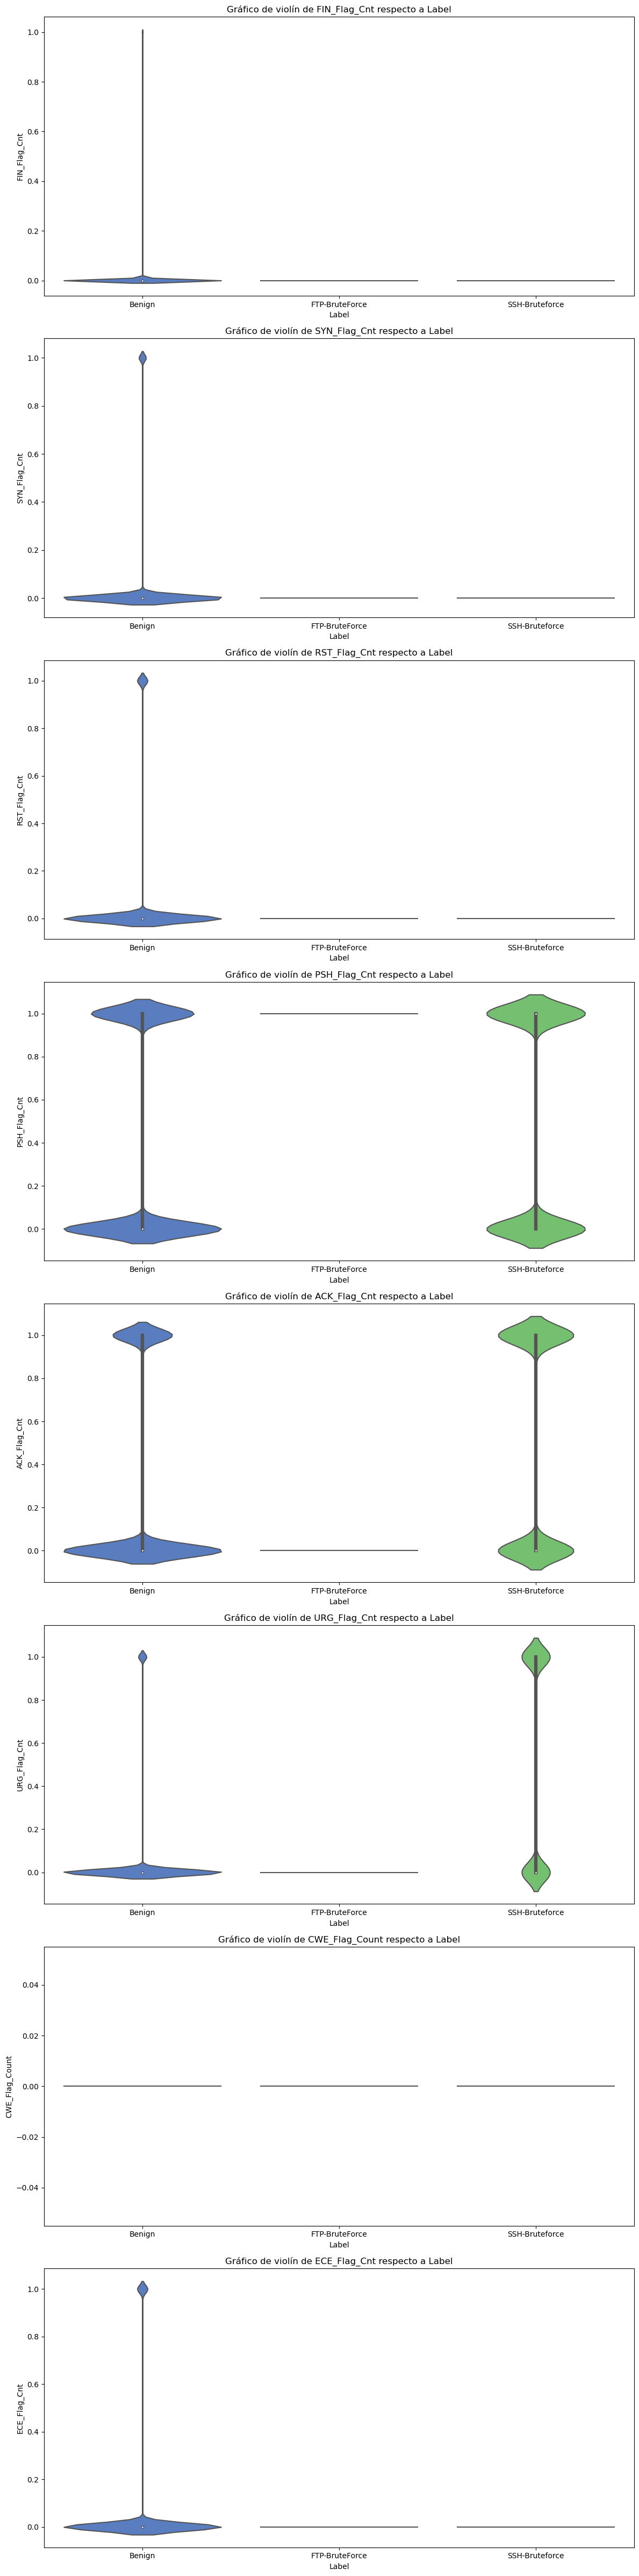

In [68]:
# Crear un gráfico de violín para cada variable de flags según 'Label'
fig, axes = plt.subplots(len(var_flag), 1, figsize=(12, 6 * len(var_flag)))

# Iterar sobre las variables de flags para crear un gráfico de violín por cada una
for i, column in enumerate(var_flag):
    sns.violinplot(x='Label', y=column, data=IDS2018_BruteForce, ax=axes[i], palette="muted")
    axes[i].set_title(f'Gráfico de violín de {column} respecto a Label')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

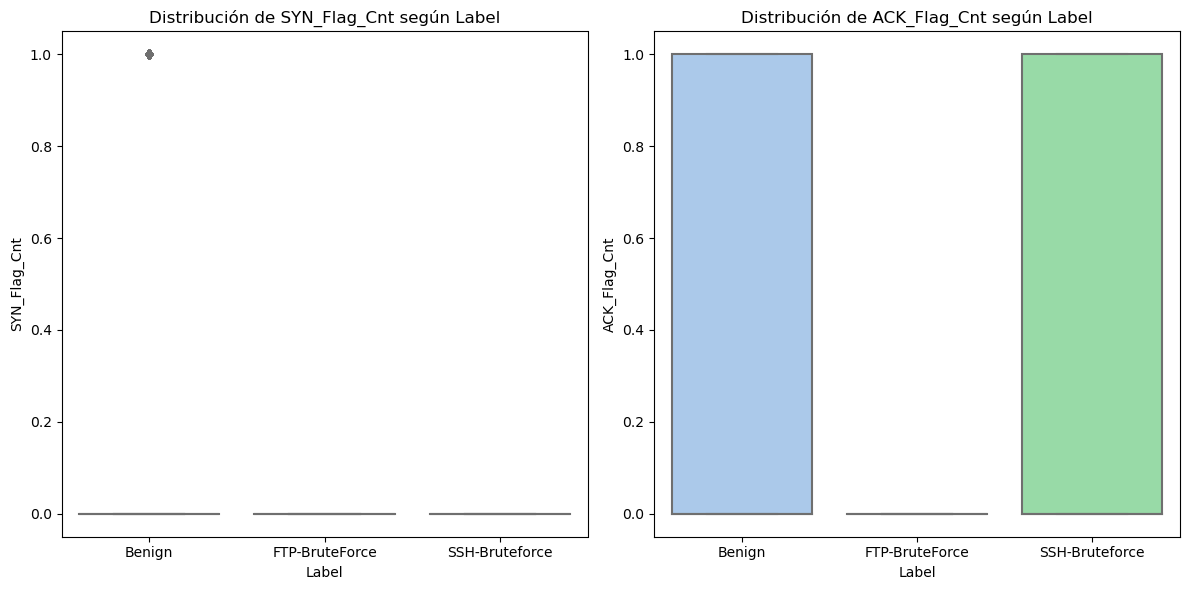

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables de las banderas SYN y ACK
flags = ['SYN_Flag_Cnt', 'ACK_Flag_Cnt']

# Crear un gráfico de boxplot para cada una de las banderas (SYN y ACK)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot para SYN_Flag_Cnt
sns.boxplot(x='Label', y='SYN_Flag_Cnt', data=IDS2018_BruteForce, ax=axes[0], palette="pastel")
axes[0].set_title('Distribución de SYN_Flag_Cnt según Label')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('SYN_Flag_Cnt')

# Boxplot para ACK_Flag_Cnt
sns.boxplot(x='Label', y='ACK_Flag_Cnt', data=IDS2018_BruteForce, ax=axes[1], palette="pastel")
axes[1].set_title('Distribución de ACK_Flag_Cnt según Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('ACK_Flag_Cnt')

plt.tight_layout()
plt.show()


In [75]:
var_flag2 = ['Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags']

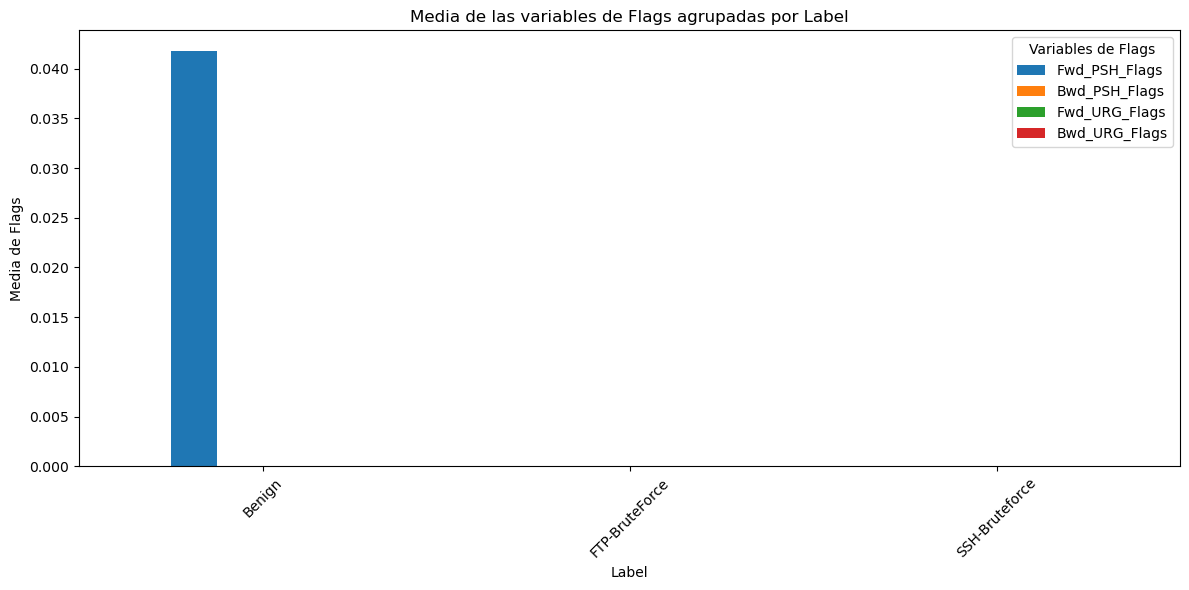

In [77]:
#Crear un DataFrame con las variables de flags y la columna 'Label'
flag_data = IDS2018_BruteForce[['Label'] + var_flag2]

# Calcular la media de las banderas agrupadas por 'Label'
flag_means = flag_data.groupby('Label')[var_flag2].mean().reset_index()

# Crear un gráfico de barras agrupado
flag_means.set_index('Label').plot(kind='bar', figsize=(12, 6))

# Configurar el gráfico
plt.title('Media de las variables de Flags agrupadas por Label')
plt.xlabel('Label')
plt.ylabel('Media de Flags')
plt.xticks(rotation=45)
plt.legend(title="Variables de Flags")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Segmentos

In [60]:
var_seg = ['Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Fwd_Seg_Size_Min'] 
IDS2018_02_seg = IDS2018_BruteForce[var_seg]

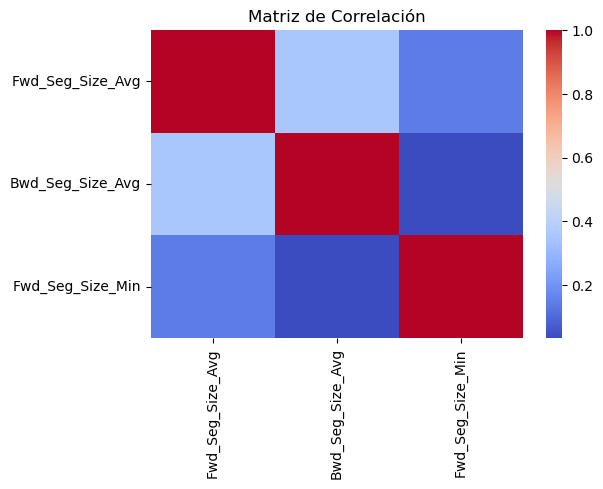

In [105]:
corr_matrix = IDS2018_02_seg.corr(numeric_only=True)

# Visualizar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

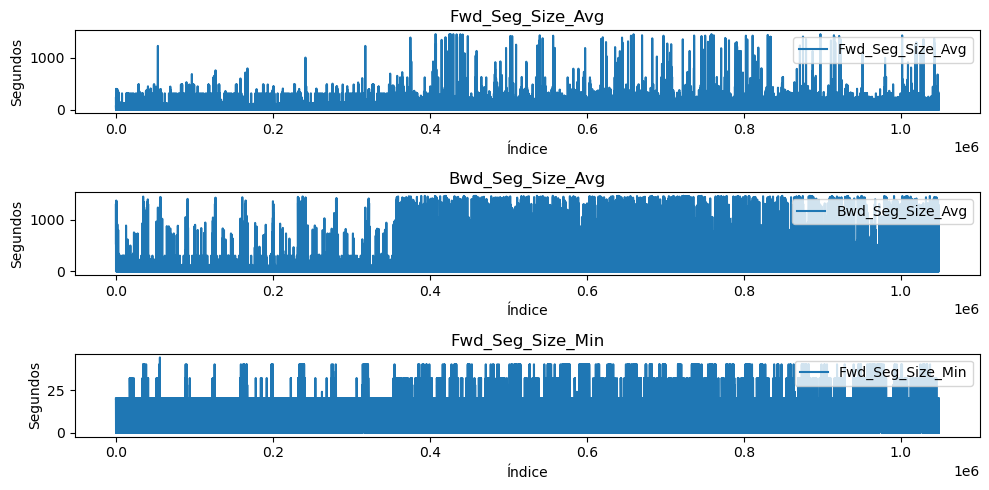

In [133]:
# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterar sobre las variables y los ejes
for i, var in enumerate(var_seg):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce.index, IDS2018_BruteForce[var], label=var)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

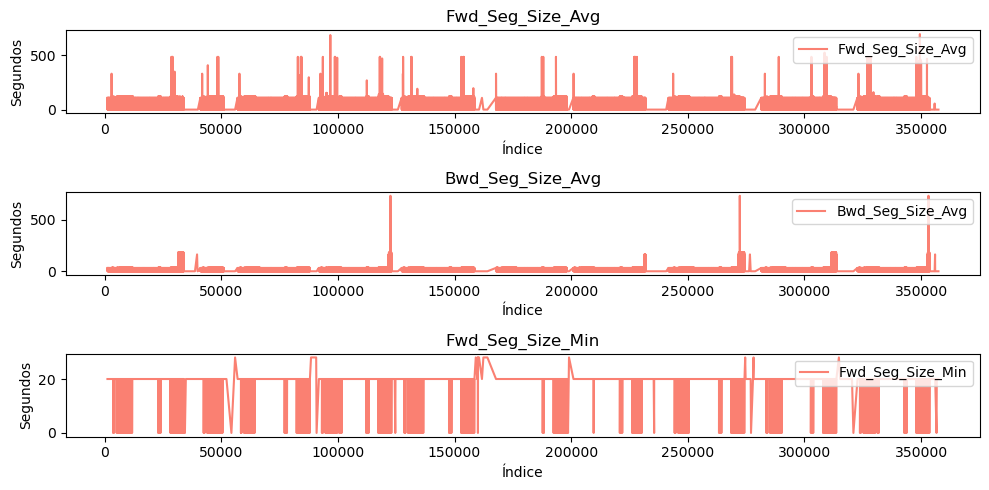

In [145]:
IDS2018_BruteForce_MAL = IDS2018_BruteForce[IDS2018_BruteForce['Label']!='Benign']

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))


axes = axes.flatten()

# Iterar sobre las variables y los ejes
for i, var in enumerate(var_seg):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce_MAL.index, IDS2018_BruteForce_MAL[var], label=var, color = colores_pastel[0])
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

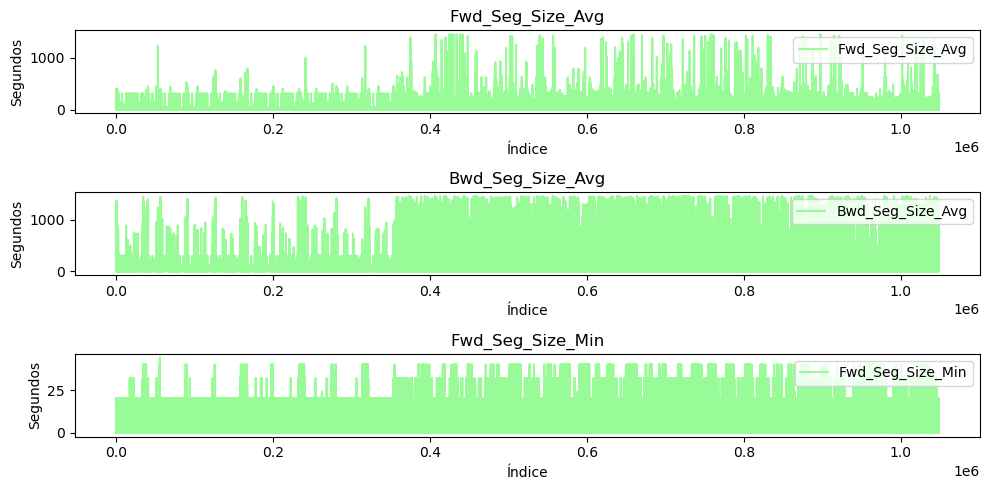

In [151]:
IDS2018_BruteForce_BEN = IDS2018_BruteForce[IDS2018_BruteForce['Label']=='Benign']

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterar sobre las variables y los ejes
for i, var in enumerate(var_seg):
    ax = axes[i]
    ax.plot(IDS2018_BruteForce_BEN.index, IDS2018_BruteForce_BEN[var], label=var,color=colores_pastel[3])
    ax.set_xlabel('Índice')
    ax.set_ylabel('Segundos')
    ax.set_title(var)
    ax.legend(loc='upper right')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()